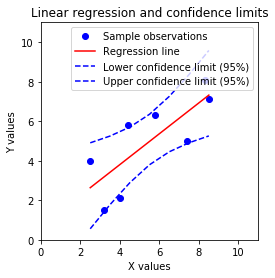

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 18 20:37:12 2019

@author: Guru
"""
# SLR_ConfidenceInterval
# linfit.py - example of confidence limit calculation for linear regression fitting.
 
# References:
# - Statistics in Geography by David Ebdon (ISBN: 978-0631136880)
# - Reliability Engineering Resource Website:
# - http://www.weibull.com/DOEWeb/confidence_intervals_in_simple_linear_regression.htm
# - University of Glascow, Department of Statistics:
# - http://www.stats.gla.ac.uk/steps/glossary/confidence_intervals.html#conflim
 
import numpy as np
import matplotlib.pyplot as plt
 
# example data
x = np.array([4.0,2.5,3.2,5.8,7.4,4.4,8.3,8.5])
y = np.array([2.1,4.0,1.5,6.3,5.0,5.8,8.1,7.1])
 
# fit a curve to the data using a least squares 1st order polynomial fit
z = np.polyfit(x,y,1)
p = np.poly1d(z)
fit = p(x)
 
# get the coordinates for the fit curve
c_y = [np.min(fit),np.max(fit)]
c_x = [np.min(x),np.max(x)]
 
# predict y values of origional data using the fit
p_y = z[0] * x + z[1]
 
# calculate the y-error (residuals)
y_err = y -p_y
 
# create series of new test x-values to predict for
p_x = np.arange(np.min(x),np.max(x)+1,1)
 
# now calculate confidence intervals for new test x-series
mean_x = np.mean(x)         # mean of x
n = len(x)              # number of samples in origional fit
t = 2.31                # appropriate t value (where n=9, two tailed 95%)
s_err = np.sum(np.power(y_err,2))   # sum of the squares of the residuals
 
confs = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((p_x-mean_x),2)/
            ((np.sum(np.power(x,2)))-n*(np.power(mean_x,2))))))
 
# now predict y based on test x-values
p_y = z[0]*p_x+z[0]
 
# get lower and upper confidence limits based on predicted y and confidence intervals
lower = p_y - abs(confs)
upper = p_y + abs(confs)
 
# set-up the plot
plt.axes().set_aspect('equal')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear regression and confidence limits')
 
# plot sample data
plt.plot(x,y,'bo',label='Sample observations')
 
# plot line of best fit
plt.plot(c_x,c_y,'r-',label='Regression line')
 
# plot confidence limits
plt.plot(p_x,lower,'b--',label='Lower confidence limit (95%)')
plt.plot(p_x,upper,'b--',label='Upper confidence limit (95%)')
 
# set coordinate limits
plt.xlim(0,11)
plt.ylim(0,11)
 
# configure legend
plt.legend(loc=0)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10)
 
# show the plot
plt.show()

0.12566134685507416


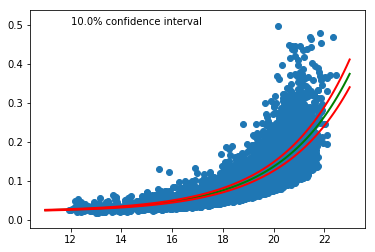

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 18 21:25:33 2019

@author: Guru
"""
#PolyR_ConfidenceInterval

from pylab import *
from scipy.optimize import curve_fit
from scipy import stats


def func(x, a, b, c):
    '''Exponential 3-param function.'''
    return a * np.exp(b * x) + c


# Read data.
x, y = np.loadtxt('https://raw.githubusercontent.com/Gurubux/StatQuest/master/ConfidenceInterval/exponential_data.dat', unpack=True)

# Define confidence interval.
ci = 0.10
# Convert to percentile point of the normal distribution.
# See: https://en.wikipedia.org/wiki/Standard_score
pp = (1. + ci) / 2.
# Convert to number of standard deviations.
nstd = stats.norm.ppf(pp)
print(nstd)

# Find best fit.
popt, pcov = curve_fit(func, x, y)
# Standard deviation errors on the parameters.
perr = np.sqrt(np.diag(pcov))
# Add nstd standard deviations to parameters to obtain the upper confidence
# interval.
popt_up = popt + nstd * perr
popt_dw = popt - nstd * perr

# Plot data and best fit curve.
scatter(x, y)
x = linspace(11, 23, 100)
plot(x, func(x, *popt), c='g', lw=2.)
plot(x, func(x, *popt_up), c='r', lw=2.)
plot(x, func(x, *popt_dw), c='r', lw=2.)
text(12, 0.5, '{}% confidence interval'.format(ci * 100.))    

show()